# A Sample Data Analysis and Modeling Project

### 1. Data Loading

First, let's load a sample dataset into a pandas DataFrame. I'll use the `california_housing_train.csv` file available in the Colab environment.

In [11]:
import pandas as pd

# Load the California Housing dataset
df = pd.read_csv("sample_data/california_housing_train.csv")

# Display the first 5 rows of the DataFrame
display(df.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


### 2. Initial Data Exploration

Next, let's get a basic understanding of the dataset, including its structure, data types, and summary statistics.

In [12]:
# Display concise summary of the DataFrame
df.info()

# Display descriptive statistics
display(df.describe())

<class 'pandas.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 3. Data Cleaning - Handling Missing Values

Let's check for any missing values in the dataset and decide on a strategy to handle them. For this example, if there are missing values, I'll fill them with the mean of their respective columns.

In [13]:
# Check for missing values
missing_values = df.isnull().sum()
display("Missing values before cleaning:", missing_values[missing_values > 0])

# Fill missing values (if any) with the mean of the column
for column in df.columns:
    if df[column].isnull().any():
        df[column] = df[column].fillna(df[column].mean())

# Re-check for missing values after cleaning
missing_values_after = df.isnull().sum()
display("Missing values after cleaning:", missing_values_after[missing_values_after > 0])

'Missing values before cleaning:'

Series([], dtype: int64)

'Missing values after cleaning:'

Series([], dtype: int64)

### 4. Data Visualization - Exploring Distributions

Visualizing the distribution of key features can provide insights into the data. Let's look at the distribution of the 'median_house_value' and 'median_income'.

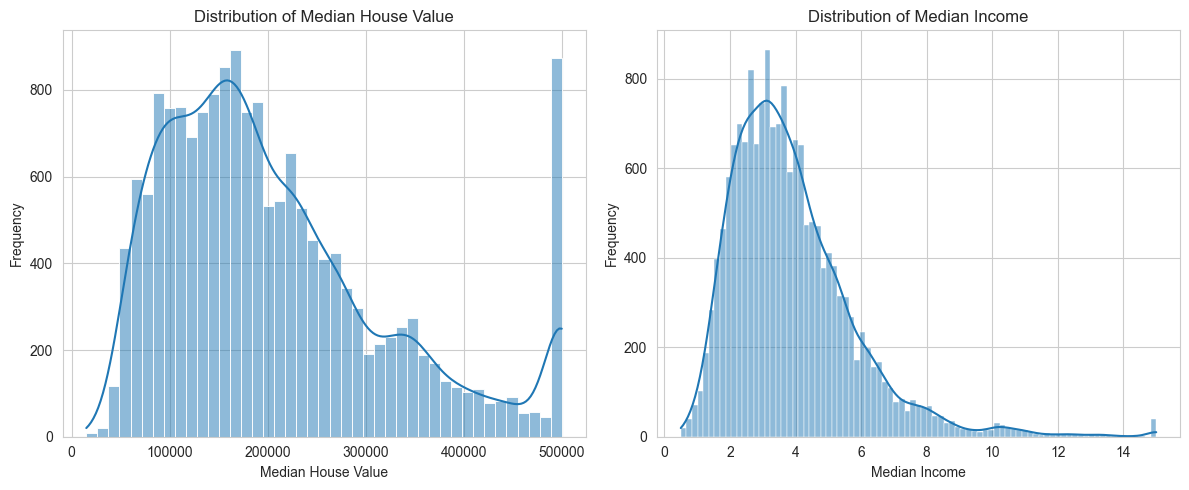

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.histplot(df['median_house_value'], kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.histplot(df['median_income'], kde=True)
plt.title('Distribution of Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()